<h1> Data Wrangling Part-I </h1>

<h5>Problem statement :</h5>
<h6>Perform the following operations using Python on any open
source dataset (e.g., data.csv)<br>
1. Import all the required Python Libraries.<br>
2. Locate an open source data from the web (e.g. https://www.kaggle.com). Provide a clear
description of the data and its source (i.e., URL of the web site).<br>
3. Load the Dataset into pandas data frame.<br>
4. Data Preprocessing: check for missing values in the data using pandas insult(), describe()
function to get some initial statistics. Provide variable descriptions. Types of variables
etc. Check the dimensions of the data frame.<br>
5. Data Formatting and Data Normalization: Summarize the types of variables by checking
the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the
data set. If variables are not in the correct data type, apply proper type conversions.<br>
6. Turn categorical variables into quantitative variables in Python.<br><br>
In addition to the codes and outputs, explain every operation that you do in the above steps and
explain everything that you do to import/read/scrape the data set.</h6>

In [2]:
#Imports 
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data used : <a href ='https://www.kaggle.com/competitions/titanic/data'> Titanic dataset </a>

In [53]:
data = pd.read_csv('train.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [3]:
# The column 'Sex' is a categorical data that has two categories 'male' and 'female'
# In case of just two categories a simple function can be used instead of more advanced techniques like one hot encoding.
# Custom function

def cat_to_num(value):
    """
    This function converts the categorical variable 'Sex' into numerical value

    Args:
        value (np.series): a column or a single value of dataset

    Returns:
        int: returns category 0 : female and 1 : male
    """
    if (value == "male"):
        return 1
    elif (value == "female"):
        return 0
    else:
        pass
    

In [58]:
data["Sex"] = data["Sex"].apply(cat_to_num)

In [59]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

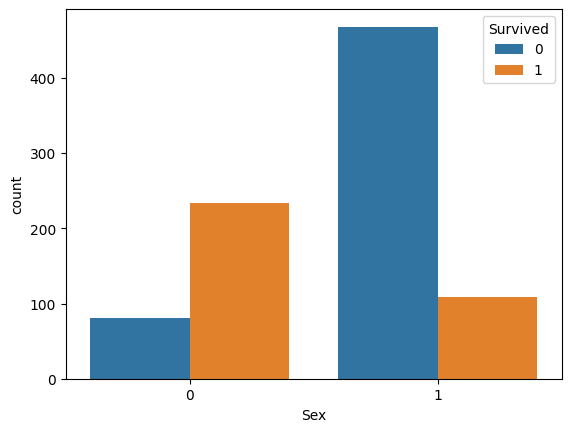

In [61]:
sns.countplot(data=data, x= 'Sex', hue = 'Survived')